# Generate Simulated Data: Fixed-Plaintext-Dataset-6

In [27]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [28]:
# Define lengh for the data set
data_leng = 1000000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4
fieldMasked2 = 44

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = True

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [29]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [30]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,1000000,50,23,0.0,5.0,-5,5


In [31]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [32]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
mask2 = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))
    mask2.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5],'\nmask2',mask2[0:5])

plaintext: [149, 149, 149, 149, 149] 
mask [166, 198, 73, 232, 34] 
mask2 [35, 35, 77, 123, 129]


In [33]:
# Verify size of plaintext
len(plaintext)

1000000

In [34]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [5.552487897970761, -0.27682550462525146, 3.777132917371648, 1.7875892195864833, 2.1871910231574163] 
labels: [3, 3, 3, 3, 3]


In [35]:
# Verify size of leakedData 
len(leakedData)

1000000

In [36]:
# Verify size of labels 
len(labels)

1000000

In [37]:
maskedData = []
maskedNoise = []
maskedNoise2 = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex]^mask2[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise2.append((bin(mask2[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5],"\nmaskedNoise2:",maskedNoise2[0:5])

maskedData: [1.3317284821664415, 8.292118906838713, 4.362003452053623, 3.319265833984276, 4.285268369856268] 
maskedNoise: [0.5234040001070674, 2.8304158150890903, 9.952432574835392, 2.6130563698028455, 9.617122915487155] 
maskedNoise2: [10.435649438150367, 3.283122922084583, 0.27979543511184746, 0.37045557398501217, -3.7335203208761296]


In [38]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        elif z == fieldMasked2:
            rawData.append(maskedNoise2[i])     
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart,noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  deque([6.76778060369881, 0.5234040001070674, 5.2660216803308275, 4.274670457702804, 5.617749128600152, -4.574944678182254, 5.8540789088249, -1.7569244997729028, 9.349341930657202, 12.965701886056266, 4.219783097515284, 4.496983490130993, -3.0495076882924605, 6.321486356414229, 11.00260104303537, -4.169756301353448, 0.3091465000934033, 5.36469945286522, 1.5872918205194946, 1.3689841330932382, 6.375103949437595, 1.3317284821664415, 14.549667039470627, 2.7891273442329587, 6.830818873026474, 7.9141295434387935, 5.301262786614163, 4.532463346353951, -5.304368875475738, 0.3647556676069632, 6.469933432702261, -1.2807294493814885, 12.722884597697544, 6.20617581803062, 3.07319103577436, -4.094053834985018, 7.762416352583988, 12.522588971160683, 3.825314874740773, 7.990290568590471, 3.2347451585304765, 10.435649438150367, -4.8951053339441835, 17.033601418459575, 2.6461536702049786, -5.584310210788493, 2.1090381281749355, 5.743571689247149, 0.8918049949100109, -1.10307492

In [39]:
# Verify size of leakedData 
len(rawTraces)

1000000

## Plot Simulated Data

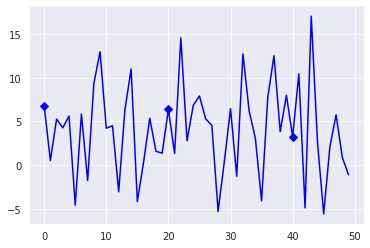

In [40]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage + randomJitter[0]-1,fieldMasked + randomJitter[0]-1,fieldMasked2 + randomJitter[0]-1])

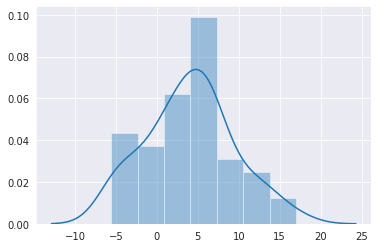

In [41]:
sns.distplot(rawTraces[0])

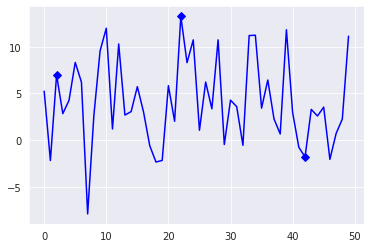

In [42]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage + randomJitter[1]-1,fieldMasked + randomJitter[1]-1,fieldMasked2 + randomJitter[1]-1])

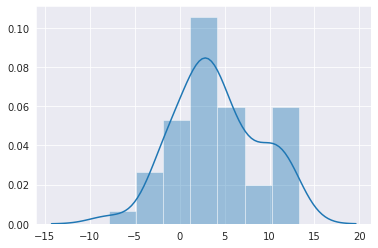

In [43]:
sns.distplot(rawTraces[1])

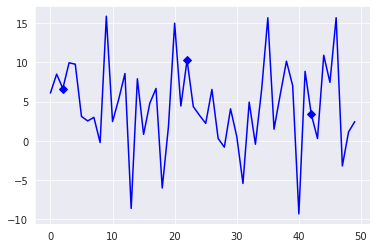

In [44]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage + randomJitter[2]-1,fieldMasked + randomJitter[2]-1,fieldMasked2 + randomJitter[2]-1])

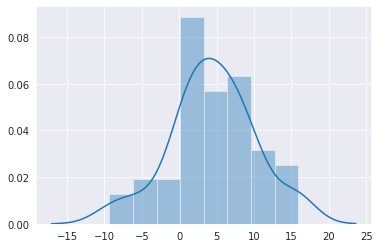

In [45]:
sns.distplot(rawTraces[2])

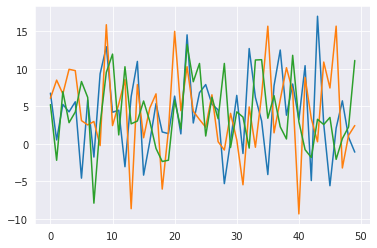

In [46]:
plt.plot(rawTraces[0],'-',rawTraces[2],'-',rawTraces[1],'-',markevery=[24])

### Data Path

In [47]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [48]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, True)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.002s

OK


In [49]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,6.767781,0.523404,5.266022,4.274670,5.617749,-4.574945,5.854079,-1.756924,9.349342,12.965702,...,10.435649,-4.895105,17.033601,2.646154,-5.584310,2.109038,5.743572,0.891805,-1.103075,149
1,5.241291,-2.188881,6.981743,2.830416,4.250041,8.319581,6.209986,-7.912045,2.622037,9.551256,...,-0.777084,-1.811620,3.283123,2.580333,3.527607,-2.065597,0.701772,2.251829,11.130874,149
2,6.087563,8.509082,6.672071,9.952433,9.779816,3.104953,2.530891,2.987272,-0.228947,15.902908,...,8.865549,3.374235,0.279795,10.918929,7.461161,15.712248,-3.216627,1.130343,2.445911,149
3,1.647735,2.613056,7.421017,18.327411,1.702983,5.156101,7.739437,-6.155469,7.885848,-10.842229,...,0.370456,3.250980,9.097153,1.417191,-3.901412,0.491984,4.721035,11.730869,2.325437,149
4,5.388602,7.707603,2.212522,-2.195241,9.617123,10.661993,1.663403,8.861382,0.731586,11.504939,...,2.965093,4.534669,6.033318,-3.733520,6.330838,5.043937,-5.288257,11.251661,7.280573,149


### Write Data

In [51]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS6_B.csv',index=False)